In [28]:
import numpy as np
import matplotlib.pyplot as plt

g2fuente:  1.0106620636624457


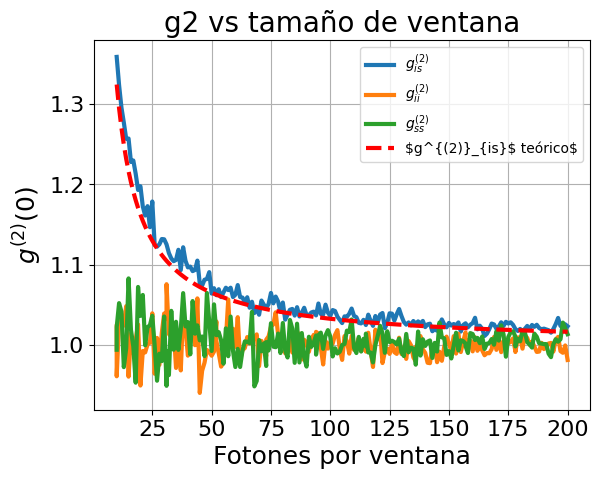

In [31]:
#la fuente tienen una distribucion poissoniana, genera pares de fotones con una tasa media de 0.1 por unidad de tiempo

%matplotlib inline

#plt.close()

rate = 0.3
time = 5000
windows = np.linspace(10, 200, 200, dtype=int)
photons1 = np.random.poisson(rate, time)


photons2 = photons1.copy()


#beam splitter 50/50
idler_in = np.array([np.random.binomial(i, 0.5) for i in photons1])
signal_in = np.array([np.random.binomial(i, 0.5) for i in photons2])

g2fuente = np.mean(idler_in*(photons1-idler_in))/np.mean(photons1*0.5)**2

g2ii_list = []
g2ss_list = []
g2is_list = []

for j in range(1,len(windows)+1):
    window = windows[j-1]
    # print("Window size: ", window)
    idler_split1 = np.zeros(time//window)
    idler_split1 = np.array([np.random.binomial(i, 0.5) for i in idler_in])
    idler_split2 = idler_in - idler_split1

    idler_out = np.zeros(time//window)
    for i in range(time//window): idler_out[i] = np.sum(idler_split1[i*window:(i+1)*window])
    idler_out2 = np.zeros(time//window)
    for i in range(time//window): idler_out2[i] = np.sum(idler_split2[i*window:(i+1)*window])

    signalsplit1 = np.array([np.random.binomial(i, 0.5) for i in signal_in])
    signalsplit2 = signal_in - signalsplit1

    signal_out = np.zeros(time//window)
    for i in range(time//window): signal_out[i] = np.sum(signalsplit1[i*window:(i+1)*window])
    signal_out2 = np.zeros(time//window)
    for i in range(time//window): signal_out2[i] = np.sum(signalsplit2[i*window:(i+1)*window])

    #correlacion entre idler y signal
    g2is= np.mean((idler_out+idler_out2)*(signal_out+signal_out2))/ (np.mean(idler_out+idler_out2)*np.mean(signal_out+signal_out2))
    g2ii= np.mean(idler_out*idler_out2)/ (np.mean(idler_out)*np.mean(idler_out2))
    g2ss= np.mean(signal_out*signal_out2)/ (np.mean(signal_out)*np.mean(signal_out2))
    g2is_list.append(g2is)
    g2ii_list.append(g2ii)
    g2ss_list.append(g2ss)

# print("g2is: ", g2is_list)
# print("g2ii: ", g2ii_list)
# print("g2ss: ", g2ss_list)

plt.figure()
plt.plot(windows, g2is_list, label=r'$g^{(2)}_{is}$', linewidth=3)
plt.plot(windows, g2ii_list, label=r'$g^{(2)}_{ii}$', linewidth=3)
plt.plot(windows, g2ss_list, label=r'$g^{(2)}_{ss}$', linewidth=3)
print("g2fuente: ", g2fuente)
plt.plot(windows, (1/(np.mean(photons1)*windows))+1, 'r--', label=r'$g^{(2)}_{is}$ teórico$', linewidth=3)
#plt.plot(windows, (1/(rate*windows))+1, 'k--')

plt.xlabel('Ventana de integración')
plt.ylabel(r'$g^{(2)}(0)$')

plt.legend()

plt.title('g2 vs tamaño de ventana', fontsize=20)
plt.grid()
plt.xlabel('Fotones por ventana', fontsize=18)
plt.ylabel(r'$g^{(2)}(0)$', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend()

plt.show()
#plt.legend(fontsize=18)

# plt.figure()
# plt.loglog(windows, g2is_list-np.ones(200), label=r'$$g^{(2)}_{is} - 1$$')



In [30]:
#sensibilidad -18 dBm
sensitivity = 10**(-18/10) / 1000 #W
BW = 11e9
wavelength = 1550e-9
h = 6.626e-34
c = 3e8
responsivity = 0.9 #A/W
window = 1/BW #segundos

P = sensitivity
print("P (W): ", P)
print("P (dBm): ", 10*np.log10(P*1000))

dark = 0.6e-9 #A
print("Dark current (A): ", dark)

P = -45.94 #dBm
P = 10**(P/10) / 1000 #W
print("P (W): ", P)

I = P * responsivity #corriente minima detectable
print("I (A): ", I)

rate = P/(h*c/wavelength)
print("Rate (photons/seg): ", rate)

rate_dark = dark/(responsivity*(h*c/wavelength))
print("Rate dark (photons/seg): ", rate_dark)

print("Ratio rate/rate_dark: ", rate/rate_dark)

#Cuantos fotones por ventana?
Photons_per_window = rate * window
print("Photons per window: ", Photons_per_window)

g2_best = 1 + 1/Photons_per_window
print("g2 best: ", g2_best**2)

g2_best_dark = 1 + 1/(Photons_per_window + rate_dark*window)
print("g2 best with dark: ", g2_best_dark)

P (W):  1.5848931924611134e-05
P (dBm):  -18.0
Dark current (A):  6e-10
P (W):  2.5468302525850445e-08
I (A):  2.29214722732654e-08
Rate (photons/seg):  198590748138.98877
Rate dark (photons/seg):  5198376764.932755
Ratio rate/rate_dark:  38.20245378877567
Photons per window:  18.053704376271707
g2 best:  1.1138486734655189
g2 best with dark:  1.0539773651081041
